In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/city_data.csv"
ride_data_to_load = "C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/ride_data.csv"

# Read the City and Ride Data"
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge = pd.merge(city_df,ride_df,on = "city")
# Display the data table for preview

In [2]:
merge.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

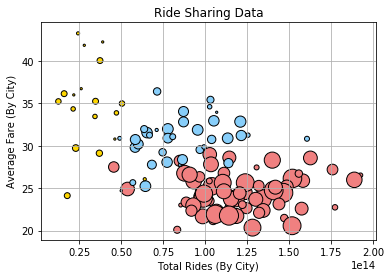

In [19]:
# Obtain the x and y coordinates for each of the three city types
x_axisU = merge[merge.type == 'Urban'].groupby(['city']).sum()[["ride_id"]]
y_axisU = merge[merge.type == 'Urban'].groupby(['city']).mean()[["fare"]]
z_axisU = merge[merge.type == 'Urban'].groupby(['city']).mean()[["driver_count"]]

x_axisS = merge[merge.type == 'Suburban'].groupby(['city']).sum()[["ride_id"]]
y_axisS = merge[merge.type == 'Suburban'].groupby(['city']).mean()[["fare"]]
z_axisS = merge[merge.type == 'Suburban'].groupby(['city']).mean()[["driver_count"]]

x_axisR = merge[merge.type == 'Rural'].groupby(['city']).sum()[["ride_id"]]
y_axisR = merge[merge.type == 'Rural'].groupby(['city']).mean()[["fare"]]
z_axisR = merge[merge.type == 'Rural'].groupby(['city']).mean()[["driver_count"]]
# Build the scatter plots for each city types
Urban_Plot = plt.scatter(x_axisU, y_axisU, marker="o", facecolors="lightcoral", edgecolors="black",
            s=z_axisU*5, alpha=1)
Suburban_Plot = plt.scatter(x_axisS, y_axisS, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=z_axisS*5, alpha=1)
Rural_Plot = plt.scatter(x_axisR, y_axisR, marker="o", facecolors="gold", edgecolors="black",
            s=z_axisR*5, alpha=1)
# Incorporate the other graph properties

# Create a legend
plt.xlabel("Total Rides (By City)")
plt.ylabel("Average Fare (By City)")
plt.title("Ride Sharing Data")
plt.grid()
# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/bubble.png")

## Total Fares by City Type

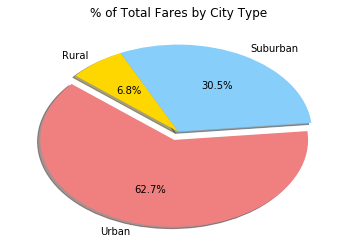

In [20]:
# Calculate Type Percents
urb_fare = (merge.loc[merge["type"]=="Urban"])
urb_sums = urb_fare.groupby(["city","driver_count"]).sum()
urb_fares = urb_sums["fare"].sum()
urb_fares

sub_fare = (merge.loc[merge["type"]=="Suburban"])
sub_sums = sub_fare.groupby(["city","driver_count"]).sum()
sub_fares = sub_sums["fare"].sum()
sub_fares

rur_fare = (merge.loc[merge["type"]=="Rural"])
rur_sums = rur_fare.groupby(["city","driver_count"]).sum()
rur_fares = rur_sums["fare"].sum()
rur_fares

#Total amount of Fare $
fares = merge.groupby(["city","driver_count"]).sum()
totalfare = fares["fare"].sum()
totalfare

fareU = urb_fares/totalfare
fareS = sub_fares/totalfare
fareR = rur_fares/totalfare

labels = ["Urban", "Suburban", "Rural"]
sizes = [fareU, fareS, fareR]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/TotalFaresPie.png")

## Total Rides by City Type

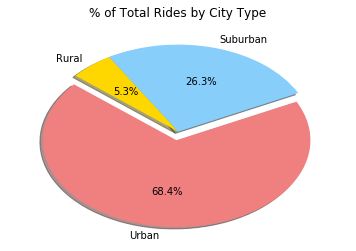

In [21]:
# Calculate Type Percents
tot_U = ((merge.loc[merge["type"]=="Urban"]).nunique())["ride_id"]
tot_S = ((merge.loc[merge["type"]=="Suburban"]).nunique())["ride_id"]
tot_R = ((merge.loc[merge["type"]=="Rural"]).nunique())["ride_id"]
total = len(merge)
perU = tot_U/total
perS = tot_S/total
perR = tot_R/total

labels = ["Urban", "Suburban", "Rural"]
sizes = [perU, perS, perR]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/TotalRidesPie.png")

## Total Drivers by City Type

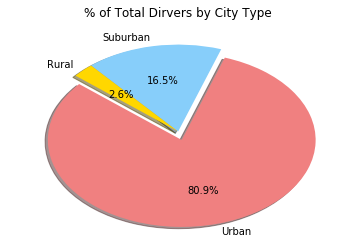

In [22]:
# Calculate Driver Percents
urb_d = merge[merge.type == 'Urban'].groupby(['city']).mean()[["driver_count"]]
Urb_d = sum(urb_d["driver_count"])
sub_d = merge[merge.type == 'Suburban'].groupby(['city']).mean()[["driver_count"]]
Sub_d = sum(sub_d["driver_count"])
rur_d = merge[merge.type == 'Rural'].groupby(['city']).mean()[["driver_count"]]
Rur_d = sum(rur_d["driver_count"])
totald = Urb_d+Sub_d+Rur_d

Uperd = Urb_d/totald
Sperd = Sub_d/totald
Rperd = Rur_d/totald

labels = ["Urban", "Suburban", "Rural"]
sizes = [Uperd, Sperd, Rperd]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
# Build Pie Charts
plt.title("% of Total Dirvers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("C:/Users/austin.edrington/Desktop/Data_Work/Homework/matplotlib-master/TotalDriversPie.png")